## What is OpenStreetMap (OSM)?
##### <div style="text-align: justify"> OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. </div>

## OSMnx 
##### <div style="text-align: justify"> OSMnx (https://osmnx.readthedocs.io/en/stable/) is a Python module that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.</div>

## NetworkX 

##### <div style="text-align: justify"> NetworkX is a Python package (https://networkx.org/) for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. </div>

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import random
import pandas as pd

### 1. Import driveable network for your city

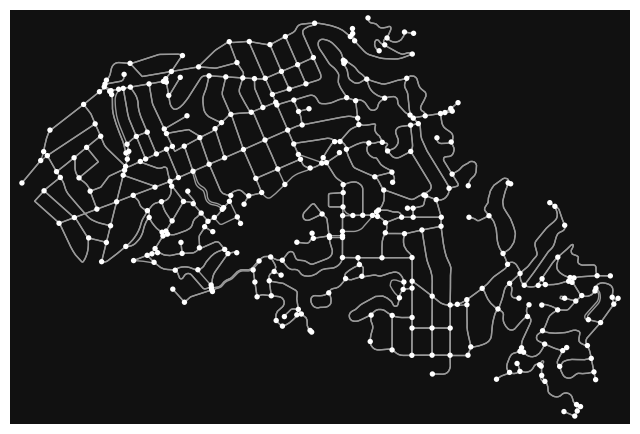

In [2]:
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

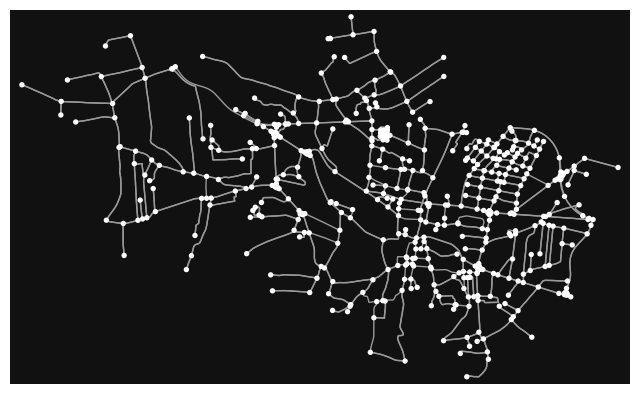

In [3]:
G = ox.graph_from_place('Wieliczka, Poland', network_type='drive')
fig, ax = ox.plot_graph(G)

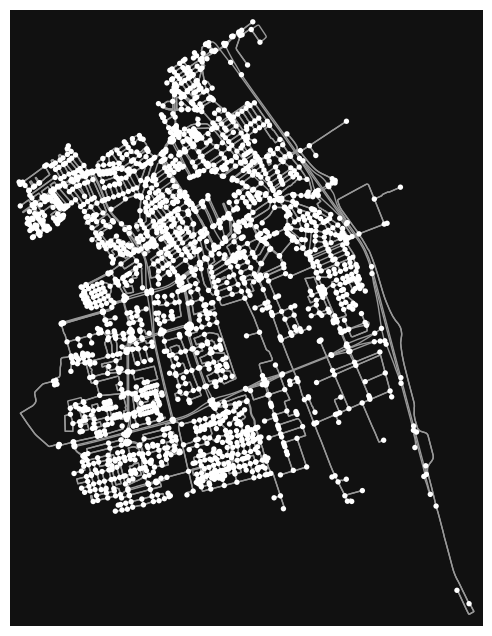

In [4]:
G1 = ox.graph_from_place('Delft, Netherlands', network_type='drive')
fig, ax = ox.plot_graph(G1)

> Save a graph representation of the road network, that includes nodes, edges and attributes like street names, lengths, speeds and travel times.

In [5]:
ox.save_graphml(G, filepath='Wieliczka_Poland.graphml')

> Load the previously saved street network from a GraphML file.

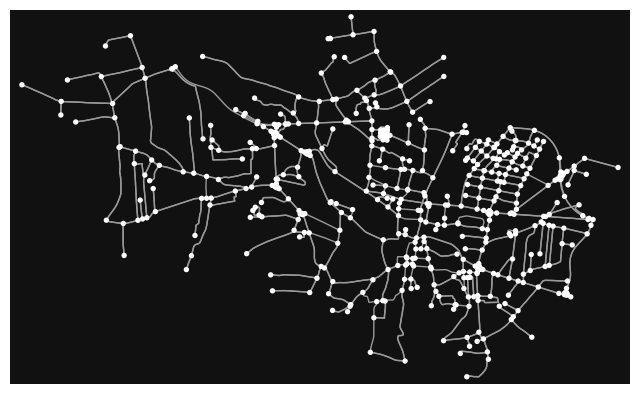

In [6]:
G1 = ox.load_graphml(filepath='Wieliczka_Poland.graphml')
fig, ax = ox.plot_graph(G1)

### 2. Plot it

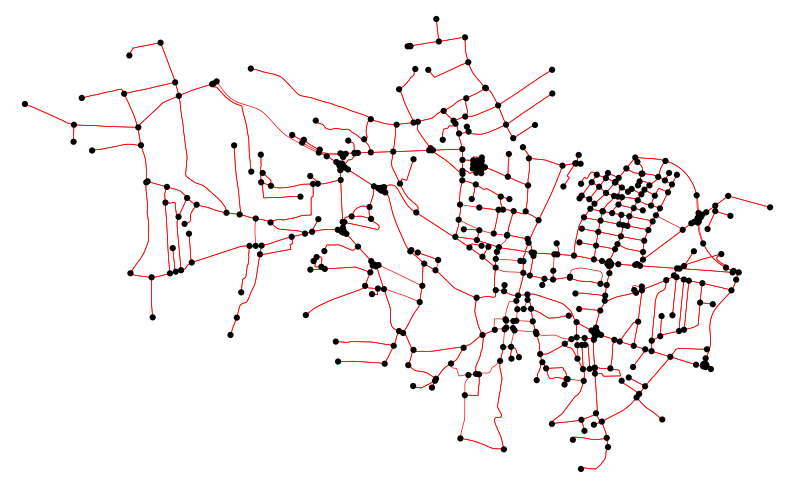

In [7]:
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=20, edge_linewidth=0.5
                        , bgcolor='white', edge_color='red', node_color='black')

> **Closeness centrality** is a measure of how close a node is to all other nodes in a network. It quantifies how quickly information (or traffic, influence, etc.) can spread from one node to the rest of the network.

- A higher closeness centrality value indicates a more central node, meaning it has a shorter average distances to all other nodes.
- A lower value means that the node is in a remote part of the network. 

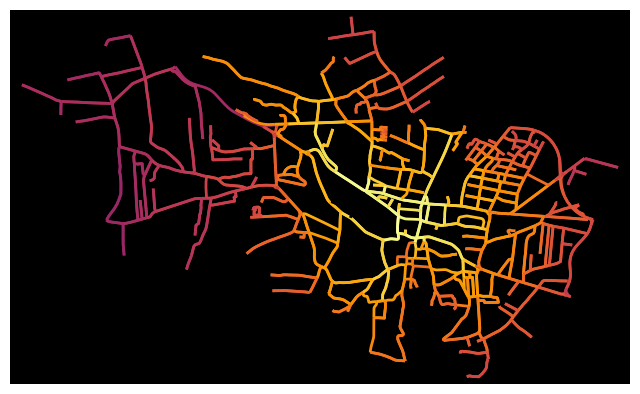

In [8]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

# retrieves the closeness centrality value of the corresponding edge
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# create a color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph by closeness centrality in line graph
fig, ax = ox.plot_graph(G, bgcolor='black', node_size=0,edge_color=ec, edge_linewidth=2, edge_alpha=1)

### 3. Graph data

> Provides `access to all nodes (intersections or road points)` in the street network G.

In [9]:
G.nodes

NodeView((34797864, 147832962, 226741768, 248005617, 263921925, 282001819, 325817816, 325821201, 699816595, 699816605, 699816722, 699816732, 699816734, 699816822, 699816869, 699818109, 699818163, 699818290, 699818303, 699818304, 699818306, 699818333, 699818455, 699818460, 699818644, 699818662, 699818695, 699818704, 699818733, 699818735, 699818736, 699818738, 699818766, 699818769, 699818808, 699818809, 699818818, 699818827, 699818839, 699818844, 699818846, 699818888, 699818897, 699818908, 699818909, 699818910, 699818928, 699818930, 699818936, 699818938, 699818947, 699819016, 699819034, 699819070, 699819174, 699819189, 699819196, 699819216, 699819256, 699819279, 699819284, 699819305, 699819311, 699819315, 699819321, 699819333, 699819350, 699819364, 699819365, 699819439, 699819446, 699819448, 699819475, 699819526, 699819530, 699819532, 699819533, 699819534, 699819536, 699819538, 699819591, 699819661, 699819886, 699819894, 699820010, 740149004, 740151842, 740152595, 826915476, 826915479, 1

In [10]:
G.nodes[34797864]

{'y': 49.9896109,
 'x': 20.0809237,
 'highway': 'traffic_signals',
 'street_count': 3}

> Returns the `edges of the graph`, which represent the streets/roads connecting intersections (nodes).

> OSMnx stores road networks as directed graphs, each edge represents a one-way or two-way street segment. 

>This returns a list of tuples representing edges in the graph:
> - node1: start node ids of the edge.
> - node2: end node ids of the edge.
> - key: a unique key (useful when multiple roads exist between the same nodes, e.g., parallel highways)

In [11]:
G.edges

OutMultiEdgeView([(34797864, 147832962, 0), (34797864, 1684082594, 0), (147832962, 2090518298, 0), (147832962, 1684082594, 0), (226741768, 2981555993, 0), (248005617, 34797864, 0), (248005617, 2981555999, 0), (263921925, 2452099172, 0), (263921925, 3884536580, 0), (282001819, 2090492510, 0), (282001819, 2090492493, 0), (325817816, 8071715968, 0), (325817816, 3884536580, 0), (325817816, 2404636646, 0), (325817816, 2090498557, 0), (325821201, 1607449310, 0), (325821201, 699819364, 0), (699816595, 1947168991, 0), (699816595, 1484928117, 0), (699816595, 3436000010, 0), (699816605, 1883510609, 0), (699816722, 1607449232, 0), (699816722, 699819189, 0), (699816732, 699816734, 0), (699816732, 1607449250, 0), (699816732, 1724363226, 0), (699816734, 699816732, 0), (699816822, 8078637383, 0), (699816822, 1852050064, 0), (699816869, 699816722, 0), (699816869, 1904792913, 0), (699818109, 1852875389, 0), (699818109, 1851760816, 0), (699818109, 1852875387, 0), (699818163, 699818662, 0), (699818290, 1

> Retrieve information about a specific road segment.

In [12]:
G.get_edge_data(34797864, 147832962)

{0: {'osmid': 462555101,
  'highway': 'primary',
  'lanes': '2',
  'maxspeed': '70',
  'oneway': True,
  'ref': '94',
  'reversed': False,
  'length': 21.805553971954176}}

### gdf: A GeoDataFrame object is a type of pandas DataFrame used to handle geospatial data.

> It is a special type of pandas Dataframe used to store spatial/geographic data. It is part of the `GeoPandas library` and allows for handling and analyzing geospatial data efficiently.

> What does each GeoDataFrame contain?
> - The `nodes`. GeoDataFrame contains all intersections and endpoints in the road network.
> - The `edges`. GeoDataFrame contains the roads connecting intersections.

In [13]:
nodes, edges = ox.graph_to_gdfs(G)
nodes

,y,x,highway,street_count,geometry
osmid,,,,,
34797864,49.989611,20.080924,traffic_signals,3,POINT (20.08092 49.98961)
147832962,49.989807,20.080922,NaN,4,POINT (20.08092 49.98981)
226741768,49.986026,20.085304,NaN,3,POINT (20.0853 49.98603)
248005617,49.988063,20.081397,NaN,3,POINT (20.0814 49.98806)
263921925,49.994439,20.043583,NaN,3,POINT (20.04358 49.99444)
...,...,...,...,...,...
11812519541,49.992268,20.068026,NaN,1,POINT (20.06803 49.99227)
11875174241,49.986218,20.038376,NaN,1,POINT (20.03838 49.98622)
12164237306,50.000352,20.049866,NaN,1,POINT (20.04987 50.00035)


### 4. Plotting data on graph

> Converts a place name or address into a GeoDataFrame (GDF) with its geographic location (point geometry).

<Axes: >

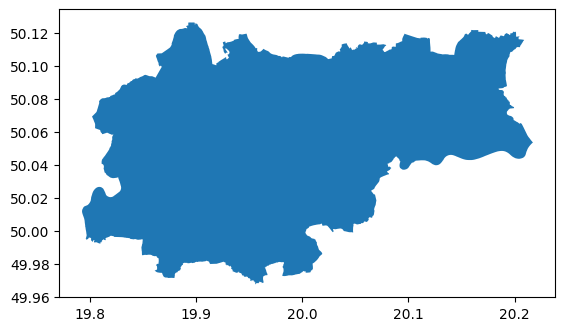

In [14]:
place ='Krakow, Poland'
area = ox.geocode_to_gdf(place)
area.plot()

> **EPSG:4326** is a **coordinate reference system (CRS)** that defines how geographic data is represented on a map. It is the standard geographic CRS used by OpenStreetMap and OSMNx. Using the correct CRS ensures that all layers align properly. 


> With the *tp_crs() function* we align all data in the same projection.

In [15]:
place_name = "Kazimierz, Krakow, Poland"

crs = "EPSG:4326"
area = ox.geocode_to_gdf(place_name).to_crs(crs)

graph = ox.graph_from_place(place_name)

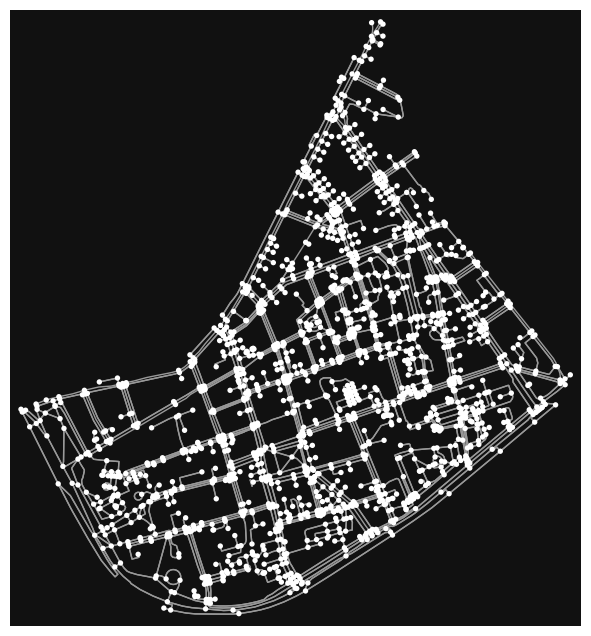

In [16]:
fig, ax = ox.plot_graph(graph)

<Axes: >

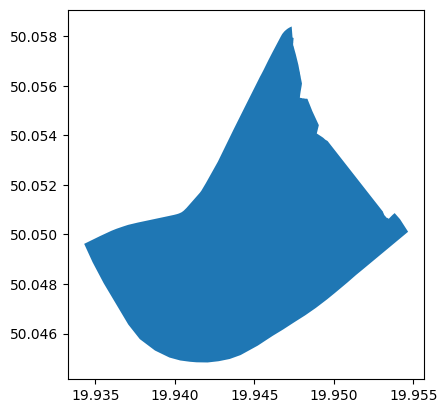

In [17]:
area = ox.geocode_to_gdf(place_name)
area.plot()

In [18]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True).to_crs(crs)

#### Get some stats about the place

> Summary statistics for a given road network graph.

Node & edge statistics:
- `n`: number of nodes
- `m`: number of edges
- `k_avg`: average node degree (average number of edges per node)
- `streets_per_node_avg`: average number of streets meeting at each node (intersection).

Road length & connectivity:
- `edge_length_total`: total length of all roads
- `edge_length_avg`: average road segment length
- `street_length_total`: total street length, considering bidirectional streets only once.
- `street_segment_count`: total number of unique street segments (not counting duplicated one-way roads).
- `street_length_avg`: average length of a single street segment in the network.

Intersection & Dead-end Analysis
- `streets_per_node_counts`: a dictionary counting nodes based on the number of streets connected to them.
- `streets_per_node_proportions`: the proportion of nodes with each number of connected streets.
- `intersection_count`: number of intersections (nodes where 3 or more streets meet).

Network Structure & Road Efficiency:
- `circuity_avg`: average circuity factor (ratio of actual road distance vs. straight-line distance).
- `self_loop_proportion`: proportion of roads that loop back to themselves.

Density Measures:
- `node_density_km`: density of nodes per square kilometer.
- `intersection_density_km`: density of intersections per square kilometer.
- `edge_density_km`: density of road segments per square kilometer.
- `street_density_km`: density of streets per square kilometer.

In [19]:
# calculate basic and extended network stats, merge them together, and display
area_transformed = area.to_crs(epsg=3857)  # Convert to a metric CRS
numeric_area = area_transformed.geometry.area.sum()  # Extract total area in square meters

# Pass numeric_area to osmnx basic_stats
stats = ox.basic_stats(G, area=numeric_area)
for key, value in stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                             510
m                                                                            1159
k_avg                                                                    4.545098
edge_length_total                                                    167532.67976
edge_length_avg                                                        144.549335
streets_per_node_avg                                                     2.666667
streets_per_node_counts                      {0: 0, 1: 101, 2: 11, 3: 355, 4: 43}
streets_per_node_proportions    {0: 0.0, 1: 0.1980392156862745, 2: 0.021568627...
intersection_count                                                            409
street_length_total                                                  89540.611676
street_segment_count                                                          663
street_length_avg                                                      135.053713
circuity_avg    

#### Get information about buildings and amenities in the area

> More information about the tags [here](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_place).

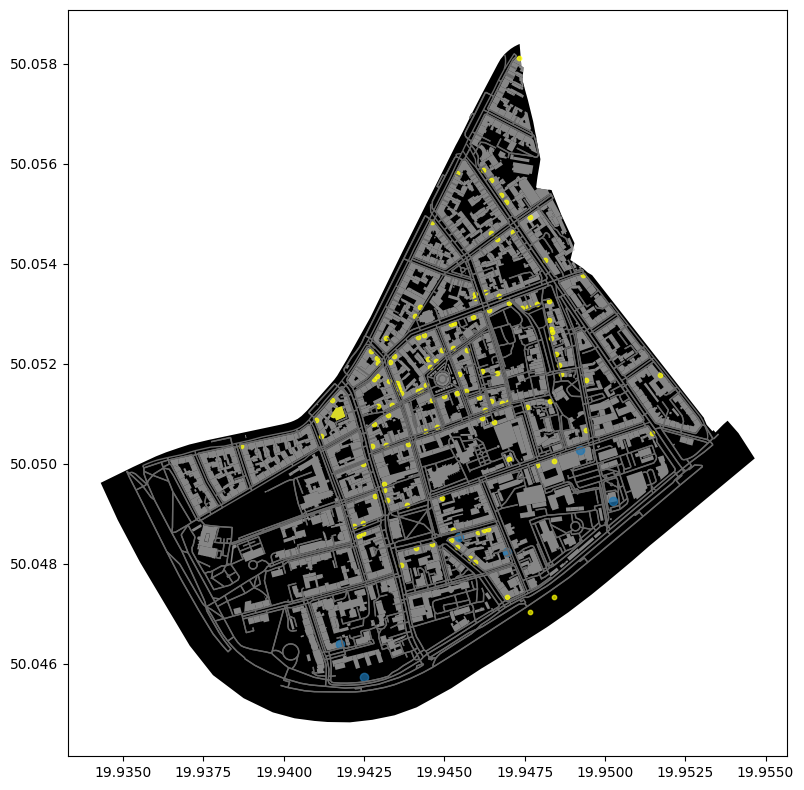

In [20]:
tags = {'building': True}
buildings = ox.features_from_place(place_name, tags)

tags = {'amenity': 'restaurant'}
restaurants = ox.features_from_place(place_name, tags)

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

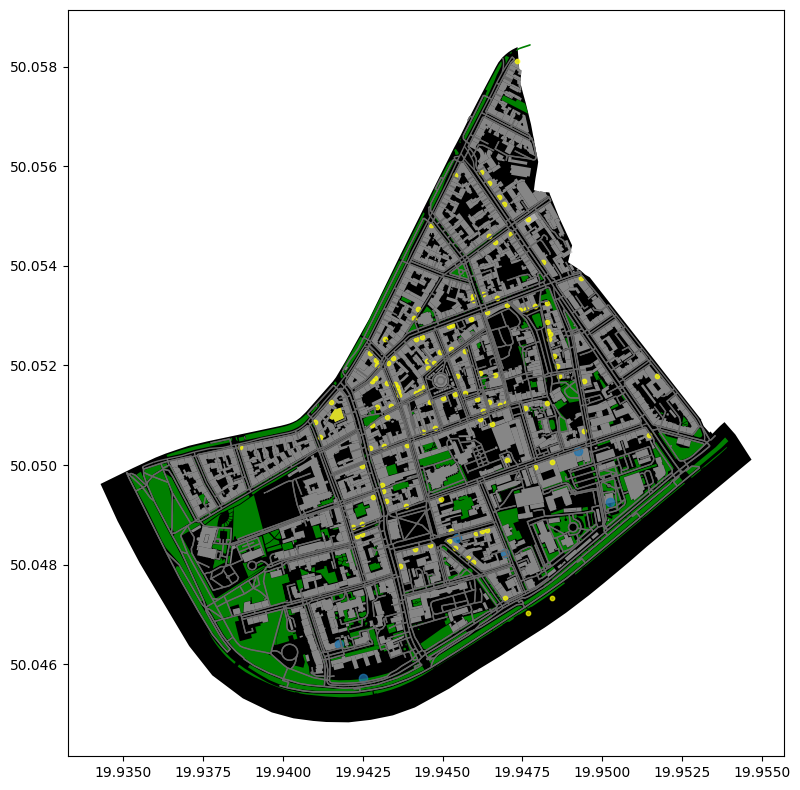

In [21]:
tags = {'leisure': 'park', 'landuse': 'grass'}
parks = ox.features_from_place(place_name, tags)

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

### 5. Graph searches 

In [22]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

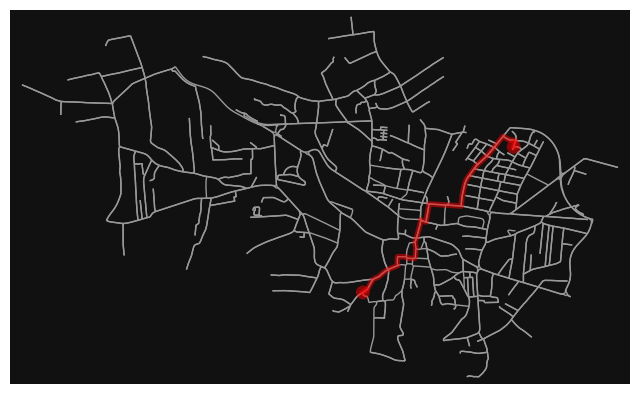

In [23]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length') # default method is dijkstra, also bellman-ford can be used
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [24]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='key')))

Shorthest path from node 2090492457 to node 1626860899 distance: 22m


#### Calculate two route by minimizing travel distance vs travel time

> Shortest path by distance is red and by travel time is blue

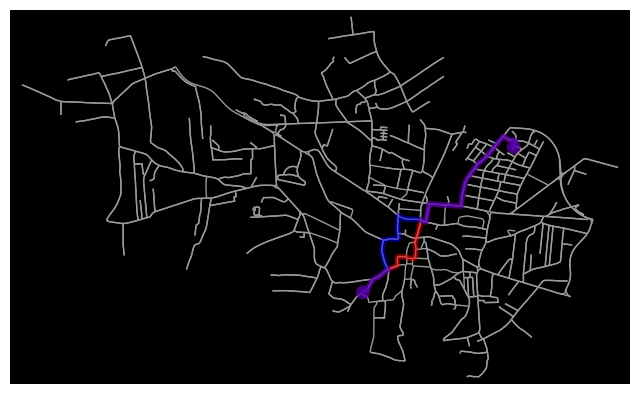

In [25]:
# find the route between these nodes then plot it
route1 = nx.shortest_path(G, o, d, weight='length')
route2 = nx.shortest_path(G, o, d, weight='travel_time')

c1 = 'r' #length
c2 = 'b' #travel_time

route_colors = [c1, c2]  # Assign a different color to each route

# Plot the graph with routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], 
                               route_colors=route_colors,  # Apply colors per route
                               route_linewidth=6,
                               node_size=0,  # Make nodes visible
                               bgcolor='k')


Tasks:
- Choose a place and create a customised plot.
- Plot the gdf for the footprint of your place.
- Show some interest points like gym, restaurants etc.
- Take latitude and longtitude for two points and associate them with a node on your graph.
- Calculate and plot the pairwise route between these points (with shortest distance).